<a href="https://colab.research.google.com/github/nvarghese-u2can/DeepLearning-with-TensorFlow--Keras-MyLearningProjects/blob/main/DL_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('cancer_classification.csv')

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
# df.isnull().sum()
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

In [ ]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

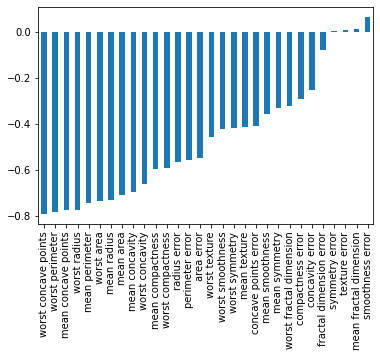

In [ ]:
df.corr()['benign_0__mal_1'].sort_values()[:-1].plot(kind='bar')

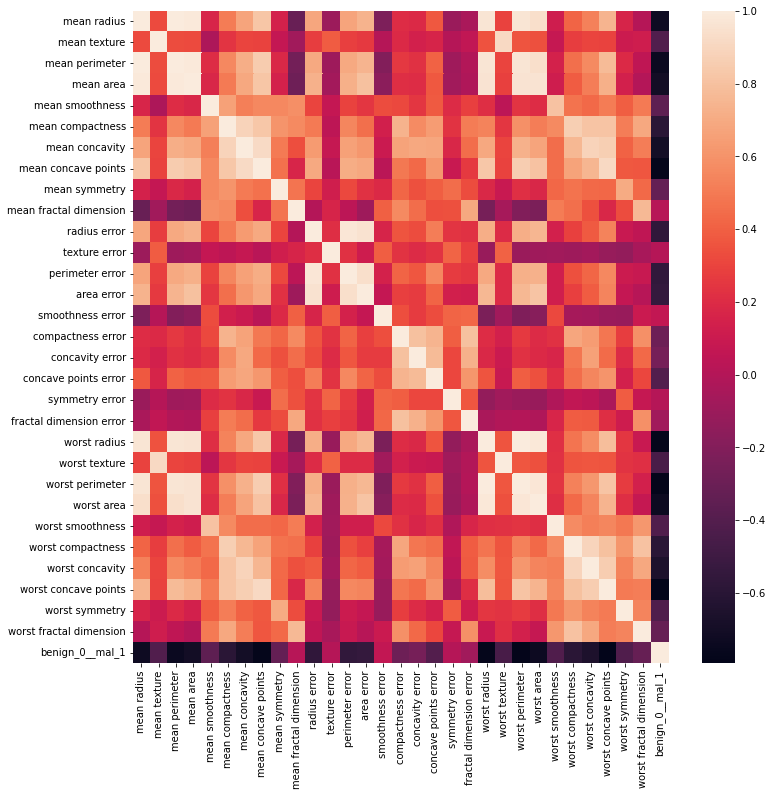

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

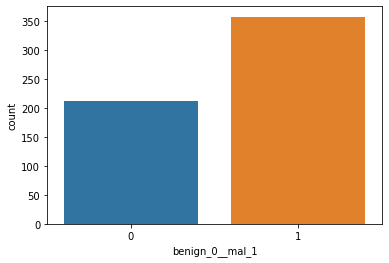

In [ ]:
sns.countplot(x='benign_0__mal_1',data=df)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df.columns
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values
# X.shape,y.shape

# X = df.iloc[:,:-1]
# y = df.iloc[:,-1]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

# Add layers
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
# final
model.add(Dense(units=1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy')

In [ ]:
model.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),verbose=1)

Epoch 1/500
14/14 [==============================] - 1s 18ms/step - loss: 0.6461 - val_loss: 0.4775
Epoch 2/500
14/14 [==============================] - 0s 5ms/step - loss: 0.3871 - val_loss: 0.3113
Epoch 3/500
14/14 [==============================] - 0s 5ms/step - loss: 0.2560 - val_loss: 0.2309
Epoch 4/500
14/14 [==============================] - 0s 5ms/step - loss: 0.1852 - val_loss: 0.1869
Epoch 5/500
14/14 [==============================] - 0s 5ms/step - loss: 0.1417 - val_loss: 0.1625
Epoch 6/500
14/14 [==============================] - 0s 5ms/step - loss: 0.1136 - val_loss: 0.1485
Epoch 7/500
14/14 [==============================] - 0s 5ms/step - loss: 0.0937 - val_loss: 0.1407
Epoch 8/500
14/14 [==============================] - 0s 6ms/step - loss: 0.0803 - val_loss: 0.1386
Epoch 9/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0705 - val_loss: 0.1335
Epoch 10/500
14/14 [==============================] - 0s 5ms/step - loss: 0.0630 - val_loss: 0.1362
Epoch 11

In [ ]:
losses = model.history.history
df_losses = pd.DataFrame(losses)
df_losses

,loss,val_loss
0,0.646060,0.477505
1,0.387058,0.311330
2,0.255955,0.230863
3,0.185206,0.186923
4,0.141692,0.162461
...,...,...
495,0.000002,0.582591
496,0.000002,0.583055
497,0.000002,0.583603
498,0.000002,0.584090


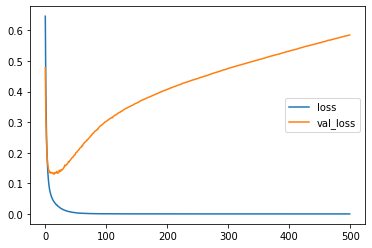

In [ ]:
df_losses.plot()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=25,mode='min')

In [ ]:
model = Sequential()

# Add layers
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
# final
model.add(Dense(units=1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy')

In [ ]:
model.fit(X_train,y_train,epochs=500,verbose=1,callbacks=[early_stop],validation_data=(X_test,y_test))

Epoch 1/500
14/14 [==============================] - 1s 15ms/step - loss: 0.6672 - val_loss: 0.5854
Epoch 2/500
14/14 [==============================] - 0s 5ms/step - loss: 0.5407 - val_loss: 0.4693
Epoch 3/500
14/14 [==============================] - 0s 5ms/step - loss: 0.4210 - val_loss: 0.3403
Epoch 4/500
14/14 [==============================] - 0s 4ms/step - loss: 0.2917 - val_loss: 0.2237
Epoch 5/500
14/14 [==============================] - 0s 7ms/step - loss: 0.1851 - val_loss: 0.1613
Epoch 6/500
14/14 [==============================] - 0s 4ms/step - loss: 0.1270 - val_loss: 0.1342
Epoch 7/500
14/14 [==============================] - 0s 5ms/step - loss: 0.0963 - val_loss: 0.1184
Epoch 8/500
14/14 [==============================] - 0s 5ms/step - loss: 0.0765 - val_loss: 0.1078
Epoch 9/500
14/14 [==============================] - 0s 5ms/step - loss: 0.0659 - val_loss: 0.1016
Epoch 10/500
14/14 [==============================] - 0s 5ms/step - loss: 0.0590 - val_loss: 0.0986
Epoch 11

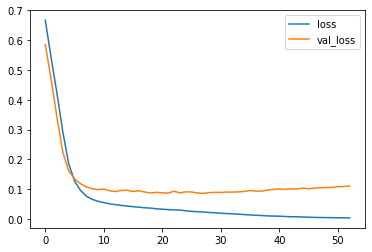

In [ ]:
loss = model.history.history
df_loss = pd.DataFrame(loss)
df_loss.plot()

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
model = Sequential()

# Add layers
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))
# final
model.add(Dense(units=1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy')

In [ ]:
model.fit(X_train,y_train,epochs=500,verbose=1,callbacks=[early_stop],validation_data=(X_test,y_test))

Epoch 1/500
14/14 [==============================] - 1s 15ms/step - loss: 0.9578 - val_loss: 0.6337
Epoch 2/500
14/14 [==============================] - 0s 5ms/step - loss: 0.8470 - val_loss: 0.5599
Epoch 3/500
14/14 [==============================] - 0s 4ms/step - loss: 0.6566 - val_loss: 0.5130
Epoch 4/500
14/14 [==============================] - 0s 4ms/step - loss: 0.6318 - val_loss: 0.4748
Epoch 5/500
14/14 [==============================] - 0s 6ms/step - loss: 0.5725 - val_loss: 0.4330
Epoch 6/500
14/14 [==============================] - 0s 5ms/step - loss: 0.5369 - val_loss: 0.3919
Epoch 7/500
14/14 [==============================] - 0s 5ms/step - loss: 0.5306 - val_loss: 0.3629
Epoch 8/500
14/14 [==============================] - 0s 6ms/step - loss: 0.4654 - val_loss: 0.3334
Epoch 9/500
14/14 [==============================] - 0s 4ms/step - loss: 0.4656 - val_loss: 0.3076
Epoch 10/500
14/14 [==============================] - 0s 5ms/step - loss: 0.4098 - val_loss: 0.2831
Epoch 11

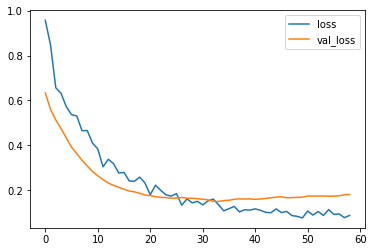

In [ ]:
loss_reg = model.history.history
loss_reg_df = pd.DataFrame(loss_reg)
loss_reg_df.plot()

In [ ]:
predictions = model.predict(X_test)
predictions = np.round(predictions).astype(int)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        56
           1       0.96      0.99      0.97        87

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



In [ ]:
print(confusion_matrix(y_test,predictions))

[[52  4]
 [ 1 86]]


In [ ]:
save = model.save('classification.h5')

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
new_model = load_model('classification.h5')